<a href="https://colab.research.google.com/github/seunghokimS/DACON-Subscriber-prediction-/blob/main/Dacon_%EA%B5%AC%EB%8F%85%EC%9E%90_%EC%98%88%EC%B8%A1_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.4 MB/s eta 0:00:00


In [ ]:
!pip install lightgbm

In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.6/230.6 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.0 MB/s eta 0:00:00


In [ ]:
!pip install scikeras

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, make_scorer
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier


from lightgbm.callback import early_stopping
import lightgbm as lgb
from lightgbm import LGBMClassifier

import optuna
from optuna.visualization import plot_param_importances

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report


from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from google.colab import files

import tensorflow as tf
# import kerastuner as kt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras import backend as K

from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, KFold

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/공모전(Dacon)/구독자예측/파생(1,2,6)/train_df1.csv')
test = pd.read_csv('/content/drive/MyDrive/공모전(Dacon)/구독자예측/파생(1,2,6)/test_df1.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/공모전(Dacon)/구독자예측/파생/sample_submission.csv')


In [ ]:
train.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target,login_pattern,learning_concentration,avg_monthly_active_days_per_type
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,1,0,4,5,0,-0.946163,0.468177,12.642917
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,2,0,1,6,1,-0.453224,4.540380,12.642917
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,2,1,0,7,1,-15.195228,1.674961,12.400398
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,1,0,1,0,1,1.371344,2.245214,12.642917
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,2,0,3,0,1,-16.390656,1.618120,12.642917


In [ ]:
train_df = train.copy()
test_df = test.copy()

In [ ]:
# num_col = [col for col in train.columns if train_df[col].dtype in ['int64', 'float64'] and col not in ['target']]
cat_col = [col for col in train.columns if train_df[col].dtype == 'object' and col not in ['user_id']]

scaler = StandardScaler()

# train_df[num_col] = scaler.fit_transform(train_df[num_col])
# test_df[num_col] = scaler.transform(test_df[num_col])

label_encoders = {}

for col in cat_col:
    label_encoders[col] = LabelEncoder()
    train_df[col] = label_encoders[col].fit_transform(train_df[col])
    test_df[col] = label_encoders[col].transform(test_df[col])


In [ ]:
train_df['learning_concentration'] = np.log(train_df['learning_concentration'])
train_df['average_time_per_learning_session'] = np.log(train_df['average_time_per_learning_session'])

test_df['learning_concentration'] = np.log(test_df['learning_concentration'])
test_df['average_time_per_learning_session'] = np.log(test_df['average_time_per_learning_session'])

In [ ]:
X = train_df.drop(columns = ['user_id', 'target'])
y = train_df['target']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

models = {"RF" : RandomForestClassifier(random_state=42),
        "SVM" : SVC(),
        "DT" : DecisionTreeClassifier(random_state=42),
        "XGB" : XGBClassifier(random_state=42),
        "LR" : LogisticRegression(random_state=42),
        "Knn" : KNeighborsClassifier(),
        "GB" : GradientBoostingClassifier(random_state=42),
        "AdaBoost" : AdaBoostClassifier(n_estimators=100, random_state=42),
        "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
        "Naive Bayes": GaussianNB()
          }
best_score = 0
best_model = " "

for name , model in models.items():
    model.fit(X_train, y_train)
    val_prediction = model.predict(X_val)
    val_f1 = f1_score(y_val, val_prediction, average='macro', zero_division = 0)
    print(f"{name} val_data Macro F1 Score : ", val_f1)
    print(classification_report(y_val, val_prediction, zero_division=0))
    if val_f1 > best_score:
        best_score = val_f1
        best_model = name

print(f"Best_model : {best_model} , Macro F1_score : {best_score}")

RF val_data Macro F1 Score :  0.4566294679568573
              precision    recall  f1-score   support

           0       0.38      0.13      0.19       758
           1       0.62      0.87      0.73      1242

    accuracy                           0.59      2000
   macro avg       0.50      0.50      0.46      2000
weighted avg       0.53      0.59      0.52      2000

SVM val_data Macro F1 Score :  0.38309685379395436
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       758
           1       0.62      1.00      0.77      1242

    accuracy                           0.62      2000
   macro avg       0.31      0.50      0.38      2000
weighted avg       0.39      0.62      0.48      2000

DT val_data Macro F1 Score :  0.5384620623411499
              precision    recall  f1-score   support

           0       0.42      0.46      0.44       758
           1       0.65      0.62      0.64      1242

    accuracy                     

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR val_data Macro F1 Score :  0.38641490301318726
              precision    recall  f1-score   support

           0       0.38      0.00      0.01       758
           1       0.62      1.00      0.76      1242

    accuracy                           0.62      2000
   macro avg       0.50      0.50      0.39      2000
weighted avg       0.53      0.62      0.48      2000

Knn val_data Macro F1 Score :  0.49533688493485806
              precision    recall  f1-score   support

           0       0.38      0.30      0.33       758
           1       0.62      0.70      0.66      1242

    accuracy                           0.55      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.53      0.55      0.53      2000

GB val_data Macro F1 Score :  0.39735862045145703
              precision    recall  f1-score   support

           0       0.48      0.02      0.03       758
           1       0.62      0.99      0.76      1242

    accuracy                   

# DT optuna

In [ ]:
test_X = test_df.drop(columns=['user_id'])

In [ ]:
def objective(trial):
    param = {
        'max_depth' : trial.suggest_int('max_depth', 1, 64),
        'min_samples_split' : trial.suggest_float('min_samples_split', 0.1, 1.0),
        'min_samples_leaf' : trial.suggest_int('min_samples_leaf', 1, 10),
        'criterion' : trial.suggest_categorical('criterion',['gini','entropy']),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2', None]),
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced']),
        'splitter': trial.suggest_categorical('splitter', ['best', 'random'])

    }
    clf = DecisionTreeClassifier(**param)
    f1_macro = make_scorer(f1_score, average='macro')
    scores = cross_val_score(clf, X, y, n_jobs = -1, cv = 5, scoring = f1_macro)

    return np.mean(scores)

study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials=100)

print(f"Best trial : {study.best_trial.params}")

best_parmas = study.best_trial.params
model = DecisionTreeClassifier(**best_parmas)
model.fit(X,y)

predictions = model.predict(test_X)

print(predictions)

[I 2023-12-09 12:30:12,821] A new study created in memory with name: no-name-0b47f7c8-bbd5-4ba4-acb7-b335059599a9
[I 2023-12-09 12:30:15,214] Trial 0 finished with value: 0.42442881886264044 and parameters: {'max_depth': 48, 'min_samples_split': 0.9127168112775293, 'min_samples_leaf': 3, 'criterion': 'gini', 'max_features': 'log2', 'class_weight': 'balanced', 'splitter': 'best'}. Best is trial 0 with value: 0.42442881886264044.
[I 2023-12-09 12:30:15,347] Trial 1 finished with value: 0.38309682500808584 and parameters: {'max_depth': 58, 'min_samples_split': 0.5392374230960032, 'min_samples_leaf': 7, 'criterion': 'entropy', 'max_features': 'auto', 'class_weight': None, 'splitter': 'best'}. Best is trial 0 with value: 0.42442881886264044.
[I 2023-12-09 12:30:15,439] Trial 2 finished with value: 0.3835387420162129 and parameters: {'max_depth': 53, 'min_samples_split': 0.3017820042180338, 'min_samples_leaf': 8, 'criterion': 'gini', 'max_features': 'auto', 'class_weight': None, 'splitter': 

Best trial : {'max_depth': 24, 'min_samples_split': 0.15784906263866477, 'min_samples_leaf': 8, 'criterion': 'entropy', 'max_features': None, 'class_weight': 'balanced', 'splitter': 'random'}
[0 0 0 ... 0 0 0]


# knn bagging test

In [ ]:
train_df1 = train.copy()
test_df1 = test.copy()

In [ ]:
num_col = [col for col in train.columns if train_df1[col].dtype in ['int64', 'float64'] and col not in ['target']]
cat_col = [col for col in train.columns if train_df1[col].dtype == 'object' and col not in ['user_id']]

scaler = StandardScaler()

train_df[num_col] = scaler.fit_transform(train_df1[num_col])
test_df[num_col] = scaler.transform(test_df1[num_col])

label_encoders = {}

for col in cat_col:
    label_encoders[col] = LabelEncoder()
    train_df1[col] = label_encoders[col].fit_transform(train_df1[col])
    test_df1[col] = label_encoders[col].transform(test_df1[col])

In [ ]:
X = train_df1.drop(columns = ['user_id', 'target'])
y = train_df1['target']
test_X = test_df.drop(columns=['user_id'])

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

knn_bagging_model = BaggingClassifier(
    base_estimator = KNeighborsClassifier(),
    n_estimators=20,
    random_state=42,
    n_jobs=-1
)


knn_bagging_model.fit(X_train, y_train)

val_pred = knn_bagging_model.predict(X_val)
val_f1_score = f1_score(y_val, val_pred, average ='macro')
print(f"Validation Accuracy: {val_f1_score}")

train_pred = knn_bagging_model.predict(X)
va1_f1_score = f1_score(y, train_pred, average='macro')
print(f"Training Macro F1 Score: {val_f1_score}")

# test_pred = knn_bagging_model.predict(test_X)
# print("Test predict")
# test_pred


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Validation Accuracy: 0.500993382408866
Training Macro F1 Score: 0.500993382408866


# Decision Tree bagging

# light gbm test

In [ ]:
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# model = LGBMClassifier()


# early_stopping_callback = early_stopping(stopping_rounds=100, verbose=True)

# model.fit(
#     X_train,
#     y_train,
#     eval_set=[(X_val, y_val)],
#     callbacks=[early_stopping_callback]
# )


# val_pred = model.predict(X_val)
# val_f1_score = f1_score(y_val, val_pred, average='macro')

# print("검증 데이터에 대한 Macro F1 Score:", val_f1_score)

# y_pred = model.predict(test_X)


# print("테스트 데이터 예측 결과:")
# print(y_pred)

# 'boosting_type': 'gbdt','rf'

In [ ]:
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# def objective(trial):
#     param = {
#         'objective': 'binary',
#         'metric': 'binary_logloss',
#         'verbosity': -1,
#         'boosting_type': 'gbdt',
#         'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
#         'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
#         'num_leaves': trial.suggest_int('num_leaves', 2, 256),
#         'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
#         'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
#         'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
#         'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
#     }
#     early_stopping_callback = early_stopping(stopping_rounds=100, verbose=True)

#     clf = LGBMClassifier(**param)
#     clf.fit(
#         X_train,
#         y_train,
#         eval_set=[(X_val, y_val)],
#         callbacks = [early_stopping_callback])
#     pred = clf.predict(X_val)
#     f1 = f1_score(y_val, pred, average='macro')
#     return f1

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)

# print(f'Number of finished trials: {len(study.trials)}')
# print('Best trial:')
# trial = study.best_trial

# print(f'  Value: {trial.value}')
# print('  Params: ')
# for key, value in trial.params.items():
#     print(f'    {key}: {value}')


In [ ]:
# best_params = study.best_trial.params

# early_stopping_callback = early_stopping(stopping_rounds=100, verbose=True)
# model = lgb.LGBMClassifier(**best_params)
# model.fit(X_train, y_train, eval_set = [(X_val, y_val)], callbacks =[early_stopping_callback])

# val_pred = model.predict(X_val)
# val_f1_score = f1_score(y_val, val_pred, average = 'macro')
# print("검증 : " , val_f1_score)

# test_pred = model.predict(test_X)
# test_pred

In [ ]:
# from google.colab import files
# sample_submission['target'] = test_pred

# sample_submission.to_csv('(12.1)knn_bagging.csv', index = False)
# files.download('(12.1)knn_bagging.csv')

#	score : 0.4966601652

# DT bagging test  

In [ ]:
train_df2 = train.copy()
test_df2 = test.copy()

In [ ]:
num_col = [col for col in train.columns if train_df2[col].dtype in ['int64', 'float64'] and col not in ['target']]
cat_col = [col for col in train.columns if train_df2[col].dtype == 'object' and col not in ['user_id']]

scaler = StandardScaler()

train_df2[num_col] = scaler.fit_transform(train_df2[num_col])
test_df2[num_col] = scaler.transform(test_df2[num_col])

label_encoders = {}

for col in cat_col:
    label_encoders[col] = LabelEncoder()
    train_df2[col] = label_encoders[col].fit_transform(train_df2[col])
    test_df2[col] = label_encoders[col].transform(test_df2[col])

In [ ]:
X = train_df2.drop(columns = ['user_id', 'target'])
y = train_df2['target']
test_X = test_df.drop(columns=['user_id'])

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# class_weight = {
#     0 : 1 - 0.62,
#     1 : 1 - 0.38
# }

dt_bagging_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=3,
    random_state=42,
    n_jobs=-1
)

dt_bagging_model.fit(X_train, y_train)

val_pred = dt_bagging_model.predict(X_val)
val_f1_score = f1_score(y_val, val_pred, average='macro')
print(f"Validation Macro F1 Score: {val_f1_score}")


# test_pred = dt_bagging_model.predict(test_X)
# print("Test Predictions:")
# print(test_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Validation Macro F1 Score: 0.5114307975085123


In [ ]:
# from google.colab import files
# sample_submission['target'] = test_pred

# sample_submission.to_csv('(12.2)DT_bagging3.csv', index = False)
# files.download('(12.2)DT_bagging3.csv')

# baggig DT optuna Test

In [ ]:
# import optuna
# from sklearn.ensemble import BaggingClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split, cross_val_score



# def objective(trial):
#     dt_max_depth = trial.suggest_int('dt_max_depth', 1, 64)
#     dt_min_samples_split = trial.suggest_int('dt_min_samples_split', 2, 30)
#     dt_min_samples_leaf = trial.suggest_int('dt_min_samples_leaf', 1, 20)

#     n_estimators = trial.suggest_int('n_estimators', 3, 100)
#     max_samples = trial.suggest_uniform('max_samples', 0.5, 1.0)
#     max_features = trial.suggest_uniform('max_features', 0.5, 1.0)

#     model = BaggingClassifier(
#         base_estimator=DecisionTreeClassifier(
#             max_depth=dt_max_depth,
#             min_samples_split=dt_min_samples_split,
#             min_samples_leaf=dt_min_samples_leaf
#         ),
#         n_estimators=n_estimators,
#         max_samples=max_samples,
#         max_features=max_features,
#         random_state=42,
#         n_jobs=-1
#     )

#     score = cross_val_score(model, X, y, n_jobs=-1, cv=5, scoring='f1_macro').mean()
#     return score

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=200)

# print(study.best_params)


# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# best_params = study.best_params
# optimized_model = BaggingClassifier(
#     base_estimator=DecisionTreeClassifier(
#         max_depth=best_params['dt_max_depth'],
#         min_samples_split=best_params['dt_min_samples_split'],
#         min_samples_leaf=best_params['dt_min_samples_leaf']
#     ),
#     n_estimators=best_params['n_estimators'],
#     max_samples=best_params['max_samples'],
#     max_features=best_params['max_features'],
#     random_state=42,
#     n_jobs=-1
# )

# optimized_model.fit(X_train, y_train)
# val_pred = optimized_model.predict(X_val)
# val_f1_score = f1_score(y_val, val_pred, average='macro')
# print(f"Validation Macro F1 Score: {val_f1_score}")

# test_pred = optimized_model.predict(test_X)
# print("Test Predictions:")
# print(test_pred)


In [ ]:
# from google.colab import files
# sample_submission['target'] = test_pred

# sample_submission.to_csv('(12.3)DT_optuna2.csv', index = False)
# files.download('(12.3)DT_optuna2.csv')

# DT_voting

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

dt1 = DecisionTreeClassifier(random_state=42)
dt2 = DecisionTreeClassifier()
dt3 = DecisionTreeClassifier()

voting_clf = VotingClassifier(estimators=[('dt1', dt1), ('dt2', dt2), ('dt3', dt3)], voting='soft')

voting_clf.fit(X_train, y_train)

val_pred = voting_clf.predict(X_val)

val_f1_score = f1_score(y_val, val_pred, average='macro')

print(f"Validation Macro F1 Score: {val_f1_score}")

Validation Macro F1 Score: 0.5294310422157076


- dt 3 = Validation Macro F1 Score: 0.5353187846726446
- df 4 = Validation Macro F1 Score: 0.532085855265624


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import KFold
import numpy as np


dt1 = DecisionTreeClassifier(random_state=42)
dt2 = DecisionTreeClassifier()
dt3 = DecisionTreeClassifier()


voting_clf = VotingClassifier(estimators=[('dt1', dt1), ('dt2', dt2), ('dt3', dt3)], voting='soft')

# KFold 교차 검증 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)

f1_scores = []

for train_index, val_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    voting_clf.fit(X_train, y_train)

    val_pred = voting_clf.predict(X_val)

    f1_scores.append(f1_score(y_val, val_pred, average='macro'))


print(f"Average Validation Macro F1 Score: {np.mean(f1_scores)}")


Average Validation Macro F1 Score: 0.5188246303994808


# DT_KNN_XGB voting

In [ ]:
import optuna
from sklearn.metrics import accuracy_score

def objective_xgb(trial):
    param = {
        'verbosity': 0,
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 9),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 5),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0)
    }
    model = XGBClassifier(**param)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    return accuracy_score(y_val, preds)

def objective_knn(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 3, 20)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    return accuracy_score(y_val, preds)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=100)

study_knn = optuna.create_study(direction='maximize')
study_knn.optimize(objective_knn, n_trials=100)

print("Best parameters for XGBClassifier:", study_xgb.best_trial.params)
print("Best parameters for KNeighborsClassifier:", study_knn.best_trial.params)

[I 2023-12-10 03:14:00,587] A new study created in memory with name: no-name-5cbf7257-52ef-4e13-a54a-f0a9fcef8db6
[I 2023-12-10 03:14:01,453] Trial 0 finished with value: 0.5705 and parameters: {'learning_rate': 0.07652764292584159, 'n_estimators': 290, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 0.9824683571076723, 'colsample_bytree': 0.8497243676242643}. Best is trial 0 with value: 0.5705.
[I 2023-12-10 03:14:01,912] Trial 1 finished with value: 0.5655 and parameters: {'learning_rate': 0.11340149421109148, 'n_estimators': 253, 'max_depth': 6, 'min_child_weight': 4, 'subsample': 0.6416729744099061, 'colsample_bytree': 0.540520575444152}. Best is trial 0 with value: 0.5705.
[I 2023-12-10 03:14:02,248] Trial 2 finished with value: 0.5855 and parameters: {'learning_rate': 0.13665008985534627, 'n_estimators': 155, 'max_depth': 4, 'min_child_weight': 3, 'subsample': 0.8528708459246555, 'colsample_bytree': 0.5056344985715604}. Best is trial 2 with value: 0.5855.
[I 2023-12-10 03:14:

Best parameters for XGBClassifier: {'learning_rate': 0.018930672518111737, 'n_estimators': 209, 'max_depth': 6, 'min_child_weight': 3, 'subsample': 0.7557751954824389, 'colsample_bytree': 0.8622388502529672}
Best parameters for KNeighborsClassifier: {'n_neighbors': 19, 'weights': 'distance'}


In [ ]:

xgb_best_params = study_xgb.best_trial.params
xgb_best_model = XGBClassifier(**xgb_best_params)
xgb_best_model.fit(X_train, y_train)

knn_best_params = study_knn.best_trial.params
knn_best_model = KNeighborsClassifier(**knn_best_params)
knn_best_model.fit(X_train, y_train)

xgb_val_pred = xgb_best_model.predict(X_val)
xgb_val_accuracy = accuracy_score(y_val, xgb_val_pred)

knn_val_pred = knn_best_model.predict(X_val)
knn_val_accuracy = accuracy_score(y_val, knn_val_pred)

print("XGB Validation Accuracy:", xgb_val_accuracy)
print("KNN Validation Accuracy:", knn_val_accuracy)

xgb_test_pred = xgb_best_model.predict(test_X)
knn_test_pred = knn_best_model.predict(test_X)

print("XGB Test Predictions:", xgb_test_pred)
print("KNN Test Predictions:", knn_test_pred)


XGB Validation Accuracy: 0.624
KNN Validation Accuracy: 0.584
XGB Test Predictions: [1 1 1 ... 1 1 1]
KNN Test Predictions: [1 1 1 ... 1 0 1]


In [ ]:
xgb_best_params = study_xgb.best_trial.params
xgb_best = XGBClassifier(**xgb_best_params, use_label_encoder=False, eval_metric='logloss')

knn_best_params = study_knn.best_trial.params
knn_best = KNeighborsClassifier(**knn_best_params)

dt_best = DecisionTreeClassifier(random_state=42)

voting_clf_best = VotingClassifier(estimators=[
    ('xgb', xgb_best),
    ('knn', knn_best),
    ('dt', dt_best)
], voting='soft')

voting_clf_best.fit(X_train, y_train)

val_pred_best = voting_clf_best.predict(X_val)

val_f1_score_best = f1_score(y_val, val_pred_best, average='macro')

print(f"Validation Macro F1 Score with Best Parameters: {val_f1_score_best}")


Validation Macro F1 Score with Best Parameters: 0.5397261711856511


In [ ]:
xgb_best_params = study_xgb.best_trial.params
xgb_best = XGBClassifier(**xgb_best_params, use_label_encoder=False, eval_metric='logloss')

knn_best_params = study_knn.best_trial.params
knn_best = KNeighborsClassifier(**knn_best_params)

dt_best = DecisionTreeClassifier(random_state=42)

voting_clf_best = VotingClassifier(estimators=[
    ('xgb', xgb_best),
    ('knn', knn_best),
    ('dt', dt_best)
], voting='soft')

voting_clf_best.fit(X, y)

pred = voting_clf_best.predict(test_X)



In [ ]:
sample_submission['target'] = pred
sample_submission.to_csv('(12.10)3voting.csv', index = False)
files.download('(12.10)3voting.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# sample_submission['target'] = xgb_test_pred
# sample_submission.to_csv('(12.9)XGB_optuna.csv', index = False)
# files.download('(12.9)XGB_optuna.csv')

In [ ]:
# sample_submission['target'] = knn_test_pred
# sample_submission.to_csv('(12.9)KNN_optuna.csv', index = False)
# files.download('(12.9)KNN_optuna.csv')

# stacking


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

base_models = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('xgb', xgb_best),
    ('knn', knn_best),
    ('nb', GaussianNB())
]

meta_model = DecisionTreeClassifier()

stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

stacking_clf.fit(X_train, y_train)

val_pred = stacking_clf.predict(X_val)

val_f1_score = f1_score(y_val, val_pred, average='macro')

print(f"Validation Accuracy: {val_f1_score}")

Validation Accuracy: 0.5234774986552981


# KNN Baging Full

In [ ]:
knn_dist = KNeighborsClassifier(weights='distance')

knn_bagging_model = BaggingClassifier(base_estimator=knn_dist, n_estimators=10, random_state=42)

knn_bagging_model.fit(X_train, y_train)

val_pred = knn_bagging_model.predict(X_val)

val_f1_score = f1_score(y_val, val_pred, average ='macro')
print(f"Validation F1_score: {val_f1_score}")

pred =

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Validation F1_score: 0.5078695407893762


In [ ]:
# knn_dist = KNeighborsClassifier(weights='distance')

# knn_bagging_model = BaggingClassifier(base_estimator=knn_dist, n_estimators=10, random_state=42)

# knn_bagging_model.fit(X, y)

# val_pred = knn_bagging_model.predict(test_X)
# val_pred

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


array([1, 1, 0, ..., 1, 0, 1])

In [ ]:
# sample_submission['target'] = val_pred
# sample_submission.to_csv('(12.10)knn_voting_full.csv', index = False)
# files.download('(12.10)knn_voting_full.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
param_grid = {
    'base_estimator__n_neighbors': [3, 5, 7, 10],
    'base_estimator__metric': ['euclidean', 'manhattan'],
    'n_estimators': [10, 20, 30]
}

knn = KNeighborsClassifier(weights='distance')

bagging_model = BaggingClassifier(base_estimator=knn, random_state=42)

grid_search = GridSearchCV(estimator=bagging_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

val_pred = grid_search.predict(X_val)

val_f1_score = f1_score(y_val, val_pred, average ='macro')
print(f"Validation F1_score: {val_f1_score}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Best Parameters: {'base_estimator__metric': 'manhattan', 'base_estimator__n_neighbors': 10, 'n_estimators': 30}
Validation F1_score: 0.49563419117647056


# MLP

In [ ]:
train_df3 = train.copy()
test_df3 = test.copy()

In [ ]:
# num_col = [col for col in train.columns if train_df3[col].dtype in ['int64', 'float64'] and col not in ['target']]
cat_col = [col for col in train.columns if train_df3[col].dtype == 'object' and col not in ['user_id']]

scaler = StandardScaler()

# train_df3[num_col] = scaler.fit_transform(train_df3[num_col])
# test_df3[num_col] = scaler.transform(test_df3[num_col])

label_encoders = {}

for col in cat_col:
    label_encoders[col] = LabelEncoder()
    train_df3[col] = label_encoders[col].fit_transform(train_df3[col])
    test_df3[col] = label_encoders[col].transform(test_df3[col])

train_df3['learning_concentration'] = np.log(train_df3['learning_concentration'])
train_df3['average_time_per_learning_session'] = np.log(train_df3['average_time_per_learning_session'])

test_df3['learning_concentration'] = np.log(test_df3['learning_concentration'])
test_df3['average_time_per_learning_session'] = np.log(test_df3['average_time_per_learning_session'])


In [ ]:
X = train_df3.drop(columns = ['user_id', 'target'])
y = train_df3['target']
test_X = test_df3.drop(columns=['user_id'])

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

def macro_f1_score(y_true, y_pred):

    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))

    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_score = 2 * (precision * recall) / (precision + recall + K.epsilon())

    return f1_score

model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=[macro_f1_score])


history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))
test_predictions = model.predict(test_X)
test_predictions_binary = np.round(test_predictions).astype(int)

Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.9920 - macro_f1_score: 0.6461 - val_loss: 0.6941 - val_macro_f1_score: 0.7488
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 0.6942 - macro_f1_score: 0.6992 - val_loss: 0.6762 - val_macro_f1_score: 0.7522
Epoch 3/10
250/250 [==============================] - 0s 2ms/step - loss: 0.7070 - macro_f1_score: 0.6761 - val_loss: 0.6860 - val_macro_f1_score: 0.6654
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6848 - macro_f1_score: 0.7048 - val_loss: 0.6741 - val_macro_f1_score: 0.7327
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 0.6803 - macro_f1_score: 0.7173 - val_loss: 0.6790 - val_macro_f1_score: 0.7612
Epoch 6/10
250/250 [==============================] - 0s 2ms/step - loss: 0.6798 - macro_f1_score: 0.7114 - val_loss: 0.6763 - val_macro_f1_score: 0.7616
Epoch 7/10
250/250 [==============================] - 0s 2ms/step - loss: 0.

In [ ]:
test_predictions_binary

array([[1],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
# from google.colab import files
# sample_submission['target'] = test_predictions_binary

# sample_submission.to_csv('(12.10)mlp_basic.csv', index = False)
# files.download('(12.10)mlp_basic.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

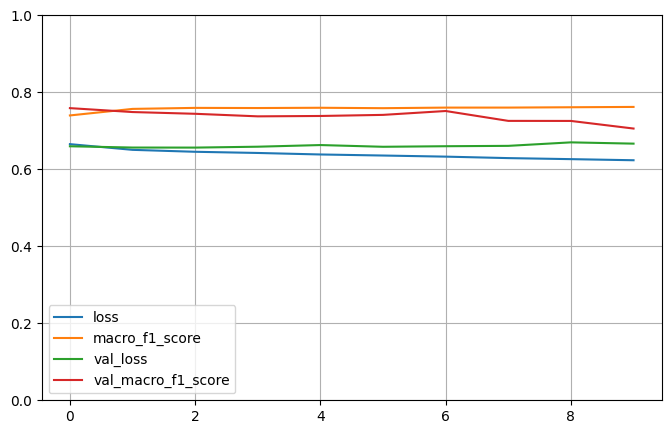

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:

model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=[macro_f1_score])

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])


Epoch 1/50
250/250 [==============================] - 3s 5ms/step - loss: 0.6853 - macro_f1_score: 0.7103 - val_loss: 0.6560 - val_macro_f1_score: 0.7612
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 0.6644 - macro_f1_score: 0.7438 - val_loss: 0.6548 - val_macro_f1_score: 0.7612
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 0.6609 - macro_f1_score: 0.7500 - val_loss: 0.6511 - val_macro_f1_score: 0.7614
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 0.6560 - macro_f1_score: 0.7546 - val_loss: 0.6533 - val_macro_f1_score: 0.7609
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.6542 - macro_f1_score: 0.7556 - val_loss: 0.6508 - val_macro_f1_score: 0.7612
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.6519 - macro_f1_score: 0.7588 - val_loss: 0.6508 - val_macro_f1_score: 0.7612
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 0.

In [ ]:

model = Sequential()
model.add(Dense(1024, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=[macro_f1_score])

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/50
250/250 [==============================] - 7s 20ms/step - loss: 0.6946 - macro_f1_score: 0.7166 - val_loss: 0.6750 - val_macro_f1_score: 0.7612
Epoch 2/50
250/250 [==============================] - 6s 25ms/step - loss: 0.6752 - macro_f1_score: 0.7548 - val_loss: 0.6678 - val_macro_f1_score: 0.7612
Epoch 3/50
250/250 [==============================] - 6s 22ms/step - loss: 0.6684 - macro_f1_score: 0.7592 - val_loss: 0.6656 - val_macro_f1_score: 0.7612
Epoch 4/50
250/250 [==============================] - 5s 18ms/step - loss: 0.6680 - macro_f1_score: 0.7598 - val_loss: 0.6648 - val_macro_f1_score: 0.7612
Epoch 5/50
250/250 [==============================] - 5s 22ms/step - loss: 0.6659 - macro_f1_score: 0.7602 - val_loss: 0.6648 - val_macro_f1_score: 0.7612
Epoch 6/50
250/250 [==============================] - 6s 24ms/step - loss: 0.6640 - macro_f1_score: 0.7609 - val_loss: 0.6636 - val_macro_f1_score: 0.7612
Epoch 7/50
250/250 [==============================] - 4s 17ms/step - l

# keras tuner

In [ ]:
! pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.2 MB/s eta 0:00:00


In [ ]:


def build_model(hp):
    model = Sequential()
    model.add(Dense(hp.Int('units_1', min_value=32, max_value=256, step=32), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.0, max_value=0.5, default=0.25, step=0.05)))
    model.add(Dense(hp.Int('units_2', min_value=32, max_value=128, step=32), activation='relu'))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.0, max_value=0.5, default=0.25, step=0.05)))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy', macro_f1_score])

    return model

tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

early_stopping = EarlyStopping(monitor='val_loss', patience=5)
tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[early_stopping])


best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

model = tuner.hypermodel.build(best_hps)
model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))


Trial 30 Complete [00h 00m 12s]
val_accuracy: 0.6200000047683716

Best val_accuracy So Far: 0.6265000104904175
Total elapsed time: 00h 04m 00s
Epoch 1/50
250/250 [==============================] - 2s 4ms/step - loss: 0.6922 - accuracy: 0.5642 - macro_f1_score: 0.6805 - val_loss: 0.6640 - val_accuracy: 0.6145 - val_macro_f1_score: 0.7541
Epoch 2/50
250/250 [==============================] - 1s 5ms/step - loss: 0.6720 - accuracy: 0.5987 - macro_f1_score: 0.7284 - val_loss: 0.6593 - val_accuracy: 0.6170 - val_macro_f1_score: 0.7576
Epoch 3/50
250/250 [==============================] - 1s 5ms/step - loss: 0.6684 - accuracy: 0.6025 - macro_f1_score: 0.7363 - val_loss: 0.6569 - val_accuracy: 0.6185 - val_macro_f1_score: 0.7588
Epoch 4/50
250/250 [==============================] - 1s 4ms/step - loss: 0.6667 - accuracy: 0.6102 - macro_f1_score: 0.7407 - val_loss: 0.6557 - val_accuracy: 0.6190 - val_macro_f1_score: 0.7591
Epoch 5/50
250/250 [==============================] - 1s 4ms/step - loss:

Epoch 1/50
250/250 [==============================] - 5s 8ms/step - loss: 5.9356 - accuracy: 0.5194 - f1_score: 0.6091 - val_loss: 0.9246 - val_accuracy: 0.6210 - val_f1_score: 0.7612
Epoch 2/50
250/250 [==============================] - 2s 7ms/step - loss: 3.9504 - accuracy: 0.5259 - f1_score: 0.6059 - val_loss: 0.6830 - val_accuracy: 0.5870 - val_f1_score: 0.7236
Epoch 3/50
250/250 [==============================] - 2s 7ms/step - loss: 2.7565 - accuracy: 0.5228 - f1_score: 0.6039 - val_loss: 0.6728 - val_accuracy: 0.6115 - val_f1_score: 0.7536
Epoch 4/50
250/250 [==============================] - 2s 7ms/step - loss: 2.0347 - accuracy: 0.5296 - f1_score: 0.6104 - val_loss: 0.6742 - val_accuracy: 0.6215 - val_f1_score: 0.7612
Epoch 5/50
250/250 [==============================] - 2s 7ms/step - loss: 1.5863 - accuracy: 0.5288 - f1_score: 0.6163 - val_loss: 0.6751 - val_accuracy: 0.6215 - val_f1_score: 0.7614
Epoch 6/50
250/250 [==============================] - 2s 9ms/step - loss: 1.3174

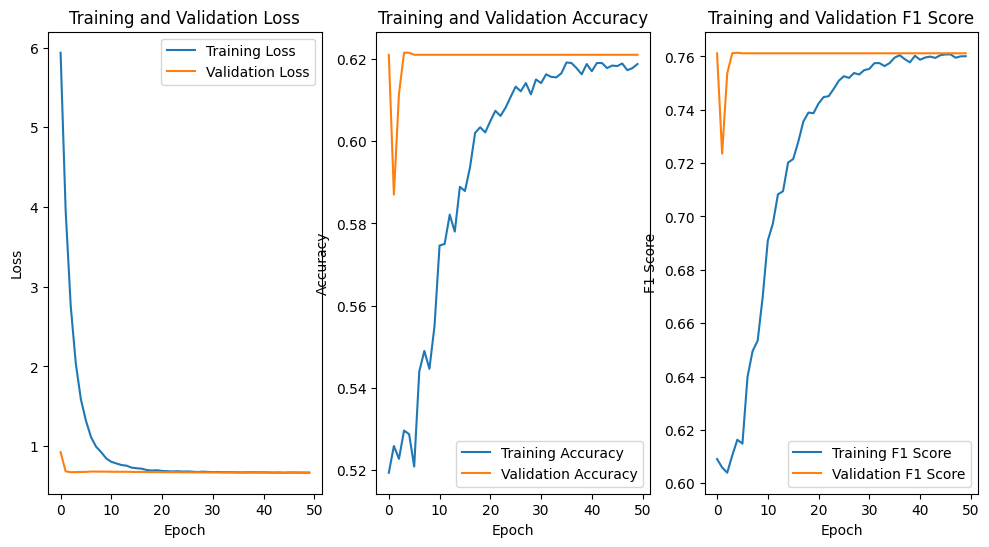

In [ ]:


def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))

    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1_val


model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy', f1_score])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history.history['f1_score'], label='Training F1 Score')
plt.plot(history.history['val_f1_score'], label='Validation F1 Score')
plt.title('Training and Validation F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend()

plt.show()



Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 4.0299 - accuracy: 0.5355 - f1_score: 0.6183 - val_loss: 1.6439 - val_accuracy: 0.6120 - val_f1_score: 0.7487
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 2.7615 - accuracy: 0.5281 - f1_score: 0.6121 - val_loss: 1.4624 - val_accuracy: 0.6210 - val_f1_score: 0.7612
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 2.0640 - accuracy: 0.5359 - f1_score: 0.6231 - val_loss: 1.3531 - val_accuracy: 0.6210 - val_f1_score: 0.7612
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1.7121 - accuracy: 0.5234 - f1_score: 0.6157 - val_loss: 1.2795 - val_accuracy: 0.6210 - val_f1_score: 0.7612
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1.4801 - accuracy: 0.5445 - f1_score: 0.6431 - val_loss: 1.2235 - val_accuracy: 0.6210 - val_f1_score: 0.7612
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1.3574

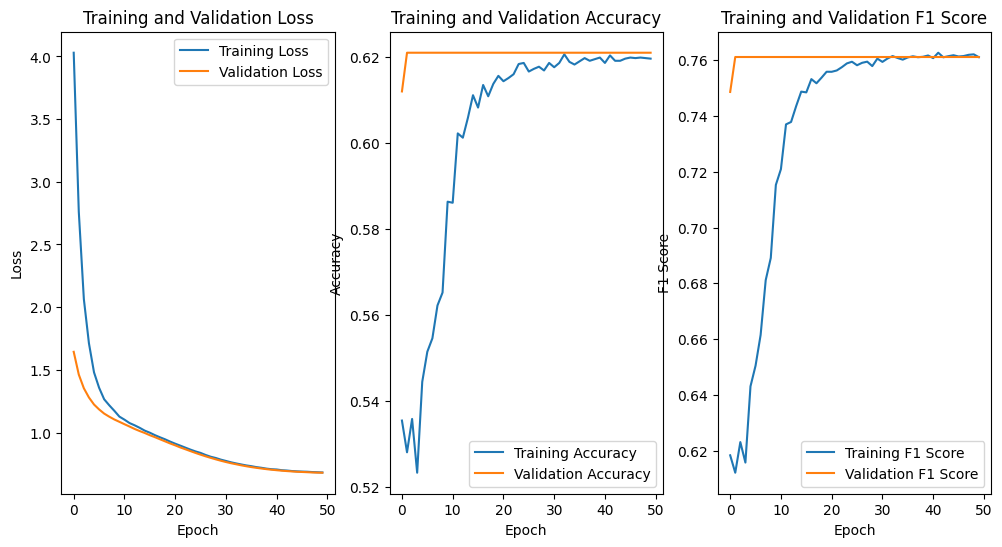

In [ ]:
from keras import backend as K
from keras.regularizers import l2
from keras import regularizers

def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))

    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1_val


model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy', f1_score])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

test_predictions = model.predict(test_X)
test_predictions_binary = np.round(test_predictions).astype(int)
test_predictions_binary

# 손실 그래프
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 정확도 그래프
plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# F1 Score 그래프
plt.subplot(1, 3, 3)
plt.plot(history.history['f1_score'], label='Training F1 Score')
plt.plot(history.history['val_f1_score'], label='Validation F1 Score')
plt.title('Training and Validation F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend()

plt.show()



In [ ]:
# from google.colab import files
# sample_submission['target'] = test_predictions_binary

# sample_submission.to_csv('(12.10)mlp_1.csv', index = False)
# files.download('(12.10)mlp_1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Reloading Tuner from my_dir/intro_to_kt/tuner0.json
Epoch 1/50
250/250 [==============================] - 2s 4ms/step - loss: 3.4240 - accuracy: 0.5239 - f1_score: 0.6101 - val_loss: 0.8505 - val_accuracy: 0.5960 - val_f1_score: 0.7290
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1.7101 - accuracy: 0.5312 - f1_score: 0.6130 - val_loss: 0.7939 - val_accuracy: 0.5525 - val_f1_score: 0.6660
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1.0289 - accuracy: 0.5357 - f1_score: 0.6250 - val_loss: 0.7672 - val_accuracy: 0.5410 - val_f1_score: 0.6529
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 0.8459 - accuracy: 0.5469 - f1_score: 0.6523 - val_loss: 0.7472 - val_accuracy: 0.6185 - val_f1_score: 0.7594
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.7895 - accuracy: 0.5736 - f1_score: 0.6920 - val_loss: 0.7427 - val_accuracy: 0.6210 - val_f1_score: 0.7612
Epoch 6/50
250/250 [========

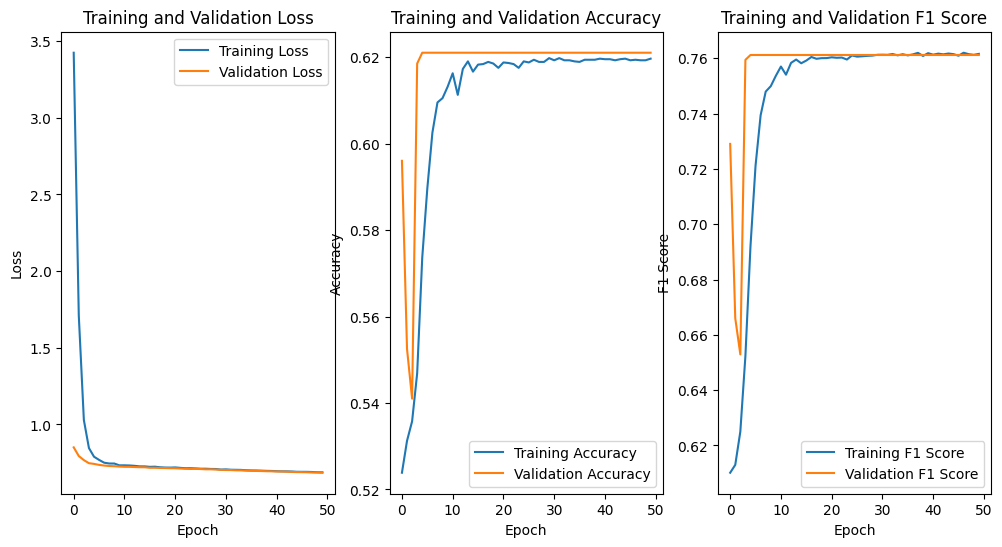

In [ ]:

def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))

    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1_val

def build_model(hp):
    model = Sequential()

    model.add(Dense(
        hp.Int('units_1', min_value=32, max_value=256, step=32),
        activation='relu',
        kernel_regularizer=regularizers.l2(hp.Float('l2_1', min_value=1e-4, max_value=1e-2, sampling='LOG', default=1e-3)),
        input_shape=(X_train.shape[1],)))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.0, max_value=0.5, default=0.25, step=0.05)))


    model.add(Dense(
        hp.Int('units_2', min_value=32, max_value=128, step=32),
        activation='relu',
        kernel_regularizer=regularizers.l2(hp.Float('l2_2', min_value=1e-4, max_value=1e-2, sampling='LOG', default=1e-3))))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.0, max_value=0.5, default=0.25, step=0.05)))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy',f1_score])

    return model

tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

early_stopping = EarlyStopping(monitor='val_loss', patience=5)
tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[early_stopping])


best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))
test_predictions = model.predict(test_X)

# 예측 결과를 반올림하여 이진값으로 변환
test_predictions_binary = (test_predictions > 0.5).astype("int32")


# 손실 그래프
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 정확도 그래프
plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# F1 Score 그래프
plt.subplot(1, 3, 3)
plt.plot(history.history['f1_score'], label='Training F1 Score')
plt.plot(history.history['val_f1_score'], label='Validation F1 Score')
plt.title('Training and Validation F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend()

plt.show()


In [ ]:

def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))

    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1_val

def build_model(hp):
    model = Sequential()

    model.add(Dense(
        hp.Int('units_1', min_value=32, max_value=256, step=32),
        activation='relu',
        kernel_regularizer=regularizers.l2(hp.Float('l2_1', min_value=1e-4, max_value=1e-2, sampling='LOG', default=1e-3)),
        input_shape=(X_train.shape[1],)))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.0, max_value=0.5, default=0.25, step=0.05)))


    model.add(Dense(
        hp.Int('units_2', min_value=32, max_value=128, step=32),
        activation='relu',
        kernel_regularizer=regularizers.l2(hp.Float('l2_2', min_value=1e-4, max_value=1e-2, sampling='LOG', default=1e-3))))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.0, max_value=0.5, default=0.25, step=0.05)))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy',f1_score])

    return model

tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

early_stopping = EarlyStopping(monitor='val_loss', patience=5)
tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[early_stopping])


best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))
test_predictions = model.predict(test_X)

# 예측 결과를 반올림하여 이진값으로 변환
# test_predictions_binary = (test_predictions > 0.5).astype("int32")
test_predictions


Reloading Tuner from my_dir/intro_to_kt/tuner0.json
Epoch 1/50
250/250 [==============================] - 2s 4ms/step - loss: 2.6895 - accuracy: 0.5320 - f1_score: 0.6174 - val_loss: 0.9428 - val_accuracy: 0.5820 - val_f1_score: 0.7191
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1.2804 - accuracy: 0.5274 - f1_score: 0.6134 - val_loss: 0.7731 - val_accuracy: 0.5745 - val_f1_score: 0.7010
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 0.8948 - accuracy: 0.5395 - f1_score: 0.6350 - val_loss: 0.7556 - val_accuracy: 0.5925 - val_f1_score: 0.7290
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 0.8011 - accuracy: 0.5669 - f1_score: 0.6818 - val_loss: 0.7449 - val_accuracy: 0.6170 - val_f1_score: 0.7565
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.7667 - accuracy: 0.5939 - f1_score: 0.7233 - val_loss: 0.7380 - val_accuracy: 0.6210 - val_f1_score: 0.7612
Epoch 6/50
250/250 [========

array([[0.6173957 ],
       [0.62116337],
       [0.6049942 ],
       ...,
       [0.62440264],
       [0.62624454],
       [0.6140218 ]], dtype=float32)

In [ ]:
# from google.colab import files
# sample_submission['target'] = test_predictions_binary

# sample_submission.to_csv('(12.10)mlp.csv', index = False)
# files.download('(12.10)mlp.csv')